# Big Trouble with the Daily Double: Analyzing Betting Patterns in *Jeopardy!*

Henry Wilson

Unit 1 Data Storytelling

Digital Narrative and Interactive Design

# I. Introduction: [This is Jeopardy!](https://www.youtube.com/watch?v=AV5sIEbj7yY)

## What is *Jeopardy!*?

*Jeopardy!* is a trivia game show that premiered in 1984, and is currently on its 40th season. 

(Technically Jeopardy! premiered in 1964, but the modern version we watch today began in '84).

### The Format

A contestant picks a clue on a 30-question gameboard. The host presents an *answer* from the clue and three contestants are given the opportunity to provide its *question*

#### Example:

| Category | Answer (presented by host)| Question (given by contestant)|
| ---------- | ---------- | ---------- |
| THE OSCARS |This adventure movie won in '35, but its remake lost in '62 | What is Mutiny on the Bounty? |

## The Gameboard

Here is a run-of-the-mill Jeopardy! gameboard:
[As of September 2023]

![game board](https://fiu-original.b-cdn.net/fontsinuse.com/use-images/16/16665/16665.png?filename=jeopardy-game-board.png)

There are six categories of questions -- these can range from history, science, pop culture, math, or simple word puzzles. Five questions exist in each category, and as their cash value increases, so does their difficulty.

### The Rounds

There are three rounds to Jeopardy: Jeopardy, Double Jeopardy, and Final Jeopardy. But for the sake of my dataset will we only be looking at the first two.

#### *Jeopardy!* (Round 1)

*Cash Amounts Since November 26, 2001:*

| Category 1 | Category 2 | Category 3 | Category 4 | Category 5 | Category 6 |
| ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| **200** | **200** | **200** | **200** | **200** | **200** |
| **400** | **400** | **400** | **400** | **400** | **400** |
| **600** | **600** | **600** | **600** | **600** | **600** |
| **800** | **800** | **800** | **800** | **800** | **800** |
| **1000**| **1000**  | **1000**  | **1000**  | **1000**  | **1000**  |

#### Double *Jeopardy!* (Round 2)

In Double Jeopardy the cash amounts for each clue is... doubled.

| Category 1 | Category 2 | Category 3 | Category 4 | Category 5 | Category 6 |
| ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
| **400** | **400** | **400** | **400** | **400** | **400** |
| **800** | **800** | **800** | **800** | **800** | **800** |
| **1200** | **1200** | **1200** | **1200** | **1200** | **1200** | 
| **1600** | **1600** | **1600** | **1600** | **1600** | **1600** |
| **2000** | **2000** | **2000** | **2000** | **2000** | **2000** |


Six Clue Categories, Five Tiers of Questions.

Behind each Jeopardy board, however, is a special tile: the Daily Double.

## The Daily Double?

**In Round 1, there is one hidden, (ostensibly) randomly placed *Daily Double* clue. In Round 2, there are two.**



Once the daily double is hit, but before its contents revealed, a contestant can choose to wager **from a minimum of $5 up to the amount they currently have** on the question. Betting the entire amount you currently have is called a "True Daily Double".


### Enter... My Dataset

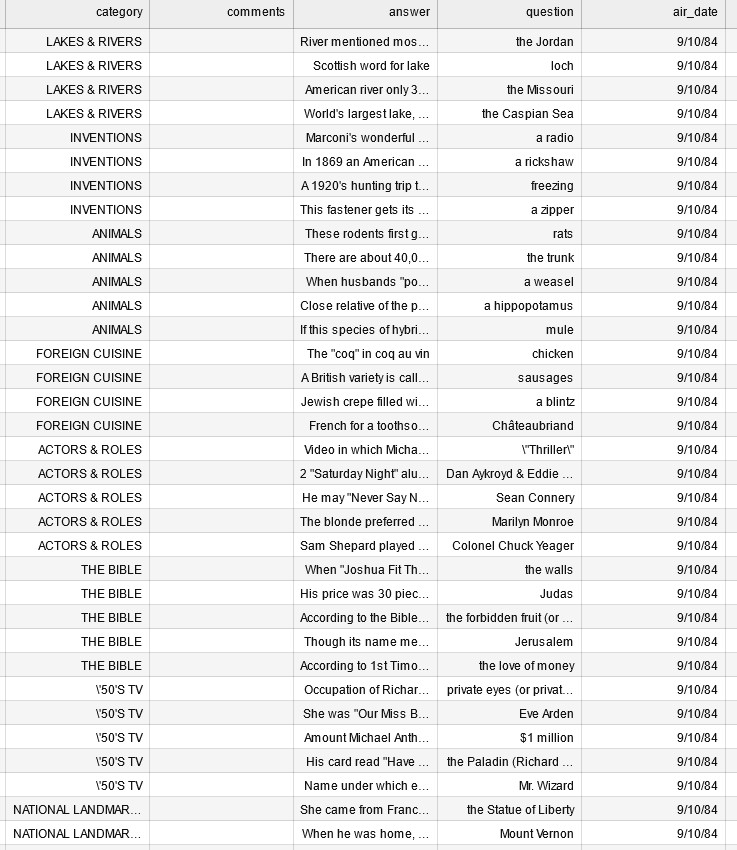

*A sample of my set... a very, very small sample*

#### [Github](https://github.com/jwolle1/jeopardy_clue_dataset) | [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/jeopardy-clues?resource=download)

Directly from the Github (Wollen):
> This dataset contains Jeopardy! clues from Season 1 through Season 39 (July 2023). It does not contain every clue that has appeared on the show. The data source prefers not to be credited.

>There are 473,067 clues in total. Most of them can be found in combined_season1-39.tsv. 

## My Questions

After I found the Jeopardy question dataset, I noticed the `daily_double_value` column. Which got me thinking -- **how has contestant betting in relation to the Daily Double changed from 1984 to today?** Has the average bet amount increased over time?

How about the location of a Daily Double -- what row was it most likely to be found in? What about Jeopardy compared to Double Jeopardy?

What can an analysis on the Daily Double bets tell us about contestant behavior? Can we gain a stronger understanding of the social mechanisms behind Jeopardy?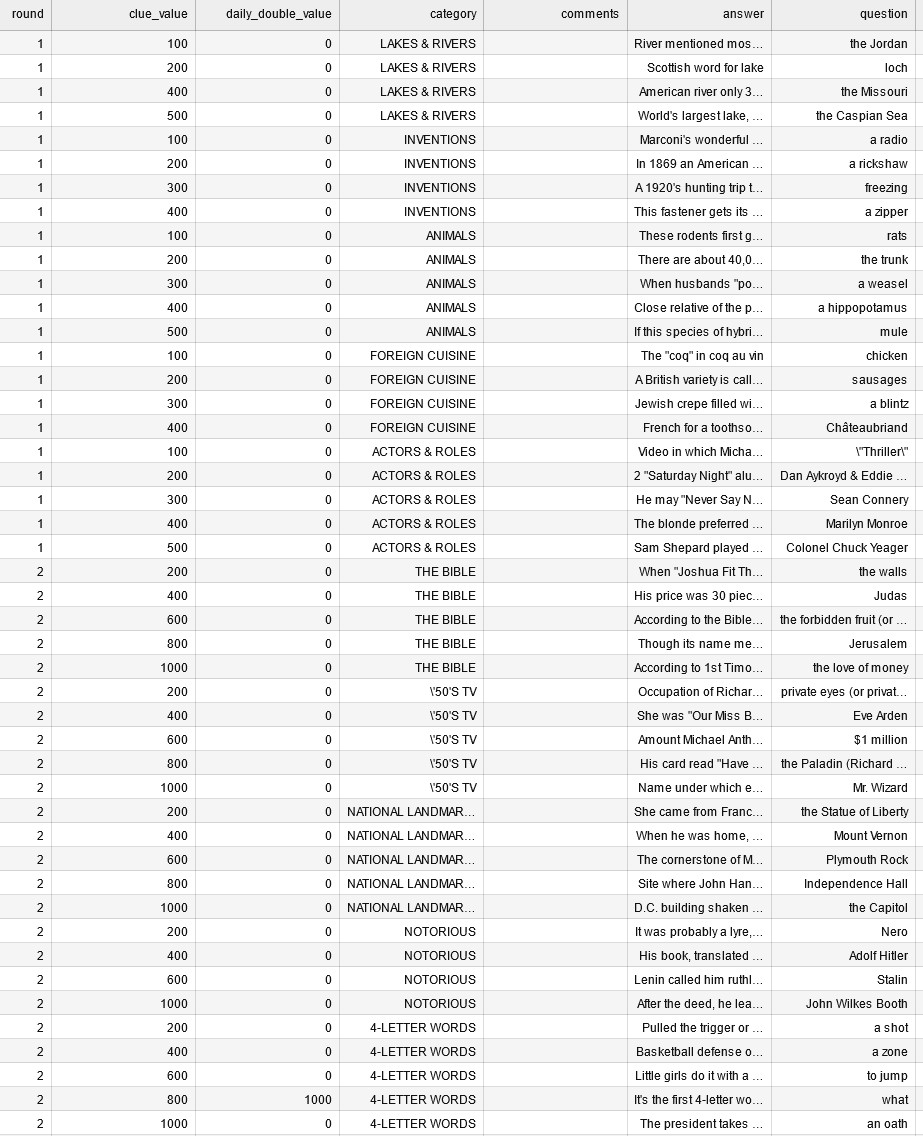




## Misc.

### Finding the Data Set

I found the data set through [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/jeopardy-clues?resource=download). There was some initial difficulty in utilizing the data to suit my needs, as there was no indicator of a clue's proximity on the game board. I would have to sift through thousands of clues to find strictly Daily Doubles. There was also no indication what episode or season any given clue was in.

### My Question's Evolution

My story's focus went full circle: intially, I sought to look at the Daily Double bets season-by-season to see how the behavior changed over time. After that, I had the idea to map every Daily Double to its placement on the gameboard, and then create a heatmap of where the daily double would appear the most. But due to inevitable constraints of my dataset, I circled back to my original idea of telling the story of how the daily double, or more specifically, the contestant's relationship with the daily double, had evolved in the 40 years of Jeopardy broadcast. More on this in the [Coda](#IV.-Coda).


### The Benefits of Visualization

A dataset containing over 400,000 clues from Jeopardy across over 8,000 episodes is rich with data to analyze -- but without visualizations, all they are is numbers. Visualizations offer a tangible look at trends over a period of time. Visualization will help with my problem because I can see the Daily Double trends across not only spans of time, but as graphical analogs to the Jeopardy gameboard itself. Simply put, visualization offers a statistically-backed graphical affirmation of real trends.

### The Harms of Visualization

More than anything else, visualizing this data might take the fun out of Jeopardy.

But on a serious note, the only problem I can see with visualizing this data is copyright -- back from the Github:

> All data is property of Jeopardy Productions, Inc. and protected under law. I am not affiliated with the show. Please don't use the data to make a public-facing web site, app, or any other product.


# II. The Dataset (and its transformations)

## Part 0: Libraries

### Importing Libraries
I am going to use matplotlib ([link](https://matplotlib.org)), pandas ([link](https://pandas.pydata.org/)), seaborn ([link](https://seaborn.pydata.org/)), and numpy ([link](https://numpy.org/)).

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Part 1: initializing the dataframes

Making the dataset readable and easier to work with

In [2]:
df = pd.read_csv("combined_season1-39.csv") #full show
df.head()

,round,clue_value,daily_double_value,category,comments,answer,question,air_date,notes
0,1,100,0,LAKES & RIVERS,NaN,River mentioned most often in the Bible,the Jordan,9/10/84,NaN
1,1,200,0,LAKES & RIVERS,NaN,Scottish word for lake,loch,9/10/84,NaN
2,1,400,0,LAKES & RIVERS,NaN,American river only 33 miles shorter than the ...,the Missouri,9/10/84,NaN
3,1,500,0,LAKES & RIVERS,NaN,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,9/10/84,NaN
4,1,100,0,INVENTIONS,NaN,Marconi's wonderful wireless,a radio,9/10/84,NaN


* df now holds a CSV with **468,317** Jeopardy clues, from September 10th, 1984 (Season 1) to June 28th, 2023 (Season 39)


## Part 2: Modifying the dataset

Adding episode numbers, season numbers, and y-indexes to each clue -- then filtering it such that we only see the Daily Doubles.


### Assigning a number value to each episode

Having a counter for when the episodes, rounds, and categories change helps us better categorize the data

In [3]:
idx = pd.Index(df['air_date'])
dupe = idx.duplicated()
episode = 0;

for index, row in df.iterrows():
    if(dupe[index] == False):
        episode = episode + 1;
    df.loc[index,('episode')] = episode;

df.to_csv("df.csv")    


### Assigning a number value to each season

Warning: Hard to look at

In [ ]:
for index, row in df.iterrows():
    episode_number = row['episode']
    if episode_number < 147:
        df.at[index, 'season'] = 1
    elif 146 < episode_number < 280:
        df.at[index, 'season'] = 2
    elif 279 < episode_number < 451:
        df.at[index, 'season'] = 3
    elif 450 < episode_number < 644:
        df.at[index, 'season'] = 4
    elif 643 < episode_number < 822:
        df.at[index, 'season'] = 5
    elif 821 < episode_number < 1016:
        df.at[index, 'season'] = 6
    elif 1015 < episode_number < 1225:
        df.at[index, 'season'] = 7
    elif 1224 < episode_number < 1367:
        df.at[index, 'season'] = 8
    elif 1366 < episode_number < 1481:
        df.at[index, 'season'] = 9
    elif 1480 < episode_number < 1581:
        df.at[index, 'season'] = 10
    elif 1580 < episode_number < 1703:
        df.at[index, 'season'] = 11
    elif 1702 < episode_number < 1932:
        df.at[index, 'season'] = 12
    elif 1932 < episode_number < 2147:
        df.at[index, 'season'] = 13
    elif 2146 < episode_number < 2377:
        df.at[index, 'season'] = 14
    elif 2376 < episode_number < 2607:
        df.at[index, 'season'] = 15
    elif 2606 < episode_number < 2837:
        df.at[index, 'season'] = 16
    elif 2836 < episode_number < 3067:
        df.at[index, 'season'] = 17
    elif 3066 < episode_number < 3296:
        df.at[index, 'season'] = 18
    elif 3295 < episode_number < 3526:
        df.at[index, 'season'] = 19
    elif 3525 < episode_number < 3756:
        df.at[index, 'season'] = 20
    elif 3755 < episode_number < 3986:
        df.at[index, 'season'] = 21
    elif 3985 < episode_number < 4216:
        df.at[index, 'season'] = 22
    elif 4215 < episode_number < 4446:
        df.at[index, 'season'] = 23
    elif 4445 < episode_number < 4676:
        df.at[index, 'season'] = 24
    elif 4675 < episode_number < 4906:
        df.at[index, 'season'] = 25
    elif 4905 < episode_number < 5136:
        df.at[index, 'season'] = 26
    elif 5135 < episode_number < 5366:
        df.at[index, 'season'] = 27
    elif 5365 < episode_number < 5596:
        df.at[index, 'season'] = 28
    elif 5595 < episode_number < 5826:
        df.at[index, 'season'] = 29
    elif 5825 < episode_number < 6066:
        df.at[index, 'season'] = 30
    elif 6065 < episode_number < 6286:
        df.at[index, 'season'] = 31
    elif 6285 < episode_number < 6516:
        df.at[index, 'season'] = 32
    elif 6515 < episode_number < 6746:
        df.at[index, 'season'] = 33
    elif 6745 < episode_number < 6976:
        df.at[index, 'season'] = 34
    elif 6975 < episode_number < 7206:
        df.at[index, 'season'] = 36
    elif 7205 < episode_number < 7396:
        df.at[index, 'season'] = 37
    elif 7395 < episode_number < 7857:
        df.at[index, 'season'] = 38
    elif 7856 < episode_number < 8086:
        df.at[index, 'season'] = 39


        df.to_csv("df.csv")    


### Assigning a number value to clue verticality (y-axis)

*Clue Verticality* is a term I'm using to describe any given clue's vertical location on the *Jeopardy!* gameboard

In [ ]:
clue_y = 0;

for index, row in df.iterrows():
    if (df.loc[index,'episode'] < 3127 ): #pre clue value increase
        df.loc[index,'old_score'] = True
        if((df.loc[index,'clue_value'] == 100 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 200 and df.loc[index,'round'] == 2)):
            clue_y = 0;
        elif((df.loc[index,'clue_value'] == 200 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 400 and df.loc[index,'round'] == 2)):
            clue_y = 1;
        elif((df.loc[index,'clue_value'] == 300 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 600 and df.loc[index,'round'] == 2)):
            clue_y = 2;
        elif((df.loc[index,'clue_value'] == 400 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 800 and df.loc[index,'round'] == 2)):
            clue_y = 3;
        elif((df.loc[index,'clue_value'] == 500 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 1000 and df.loc[index,'round'] == 2)):
            clue_y = 4;
    else:                                 #post clue value increase
        df.loc[index,'old_score'] = False
        if((df.loc[index,'clue_value'] == 200 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 400 and df.loc[index,'round'] == 2)):
            clue_y = 0;
        elif((df.loc[index,'clue_value'] == 400 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 800 and df.loc[index,'round'] == 2)):
            clue_y = 1;
        elif((df.loc[index,'clue_value'] == 600 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 1200 and df.loc[index,'round'] == 2)):
            clue_y = 2;
        elif((df.loc[index,'clue_value'] == 800 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 1600 and df.loc[index,'round'] == 2)):
            clue_y = 3;
        elif((df.loc[index,'clue_value'] == 1000 and df.loc[index,'round'] == 1) or (df.loc[index,'clue_value'] == 2000 and df.loc[index,'round'] == 2)):
            clue_y = 4;                
    
    df.loc[index,('clue_y')] = clue_y;
    
df.to_csv("df.csv")    
print('done')

### Masking: Daily Doubles Only

In [ ]:
double_mask = df["daily_double_value"] != 0 #only the daily doubles
double_df = df[double_mask]
#double_df['daily_double_diff'] = ( double_df['daily_double_value'] - double_df['clue_value'] )
double_df.to_csv('daily-doubles.csv')
#double_df['daily_double_diff'].max()

In [ ]:
for index, row in double_df.iterrows():
    double_df.at[index,'daily_double_diff'] =  double_df.at[index,'daily_double_value'] - double_df.at[index,'clue_value']
    
double_df.to_csv("daily-doubles.csv")

# III. Visualizations

## 1. Season-to-Season Comparison

### a. Generating Season Labels

In [ ]:
ylabels = []
x = 0
for i in range(1984,2023):
    x = x + 1
    ylabels+=['Season {0} ({1}/{2})'.format(x,i,int(str(i+1)[2:]))]

print(ylabels)

### b. The Plot

In [ ]:
#size
sns.set(rc={"figure.figsize":(15, 5)})

#plot
sns.boxplot(data=double_df, x='season',y='daily_double_value',dodge=True,width=.8)

#labels
plt.xlabel('Season (year)', fontdict = {'size':18})
plt.xticks(fontsize=12,rotation=45)

plt.axvline(5, linestyle="--")
plt.axvline(15, linestyle="--")
plt.axvline(25, linestyle="--")
plt.axvline(34, linestyle="--")

plt.ylabel('Daily Double Value ($)', fontdict = {'size':18})
plt.yticks()

plt.title('Daily Double Value by Jeopardy Season', fontdict = {'size':20})

### Takeaways

* **The mean value of daily double wagers has steadily increased year after year:** Looking at the middle line of each season's boxplot, a slow but sure increase is visible.
* **The overarching breadth of wagers has inflated:** The middle 50% of Daily Doubles has grown in its wager value substantially since the program's inception.
* **Outliers have steadily been rising:** As seen through the blue lines: In the 80s and 90s, the ceiling for Daily Double wagers was 10,000 - but most stayed mostly below. After that 10,000 ceiling was hit in Season 18, more bets over 10k were had. In the 2010s and the 2020s especially, a rise to 15,000 and even 20,000 has been seen.

In [ ]:
#size
sns.set(rc={"figure.figsize":(15, 5)})

#plot
sns.boxplot(data=double_df, x='season',y='daily_double_value',dodge=True,width=.8,showfliers=False)

#labels
plt.xlabel('Season (#)', fontdict = {'size':18})
plt.xticks(fontsize=12,rotation=45)

plt.axvline(5, linestyle="--")
plt.axvline(15, linestyle="--")
plt.axvline(25, linestyle="--")
plt.axvline(34, linestyle="--")

plt.ylabel('Daily Double Value ($)', fontdict = {'size':18})
plt.yticks()
plt.ylim([-200,9000])

plt.title('Daily Double Value by Jeopardy Season (no outliers)', fontdict = {'size':20})

The dotted lines each represent a season where a decade change occured 

(line 1 = 1989/1990, 2 = 1999/2000, 3 = 2009/2010, 4 = (2019/2020)

### c. The Takeaways

* **Wagers hit a wall and broke through... twice:** From seasons 1 to 17, the top range of values for each season hovered around 4000. When Jeopardy doubled the dollar amounts across the board in November 2001 (Season 18), the upper levels of wagers increased as well.
* **A new precedent has been set for Daily Double wagers since 2020** There was almost an invisible ceiling of upper values at 6000. When it was surpassed in 2020, it has not gone below again.
* **In periods of similarity, the mean stays around the same** From seasons 6 to 15, the mean value approximately stayed the same. After the cash value increase, from seasons 21  to 34, the wager mean stayed essentially the same, around 2000 (also, the highest number value present on a typical board). Post-2020, the value has distinctly increased, with no signs of going back down.

### b. The Plot (Flipped axes) [optional]

In [ ]:
#size
sns.set(rc={"figure.figsize":(10, 14)})

#plot
sns.boxplot(data=double_df, x='daily_double_value',y='season', width=1, orient='h')

#label
plt.xlabel('Daily double value ($)')
plt.ylabel('Season #')
plt.title('Daily Double Value by Jeopardy Season', fontdict = {'size':20})

In [ ]:
#size
sns.set(rc={"figure.figsize":(10, 10)})

#plot
sns.boxplot(data=double_df, x='daily_double_diff',y='season', width=1, orient='h')

#label
plt.xlabel('Daily double difference ($)')
plt.xlim(-5000,25000)


plt.ylabel('Season #')
plt.ylim(40,-2)
plt.axvline(-2000)

plt.title('Daily Double Value by Jeopardy Season (difference)', fontdict = {'size':20})
plt.tight_layout()

In [ ]:
#size
sns.set(rc={"figure.figsize":(10, 10)})

#plot
sns.boxplot(data=double_df, x='daily_double_diff',y='season', width=1, orient='h',showfliers=False)

#label
plt.xlabel('Daily double difference ($)')
plt.xlim(-5000,8000)


plt.ylabel('Season #')
plt.ylim(40,-2)
plt.axvline(-2000)

plt.title('Daily Double Value by Jeopardy Season (difference)', fontdict = {'size':20})
plt.tight_layout()

### c. The Takeaways

* **the difference doesn't get less than 2000:** That's just a limitation of the statistic

`double_df['daily_double_diff'] = double_df['daily_double_value'] - double_df['clue_value']`

A `daily_double_value` can be anything from $5 to a contestant's entire current earnings. A `clue_value` can strictly go from 100 to 2000.

When the lowest you can bet is $5, the biggest negative difference you will ever get is 5-2000= `1995`

## 3. Which row?

### a. Generating the map

In [ ]:
y_map = double_df['clue_y'].value_counts().rename_axis('level').to_frame('occurences').sort_values('level')
y_map.head()

### b. The Plot

In [ ]:
#size
sns.set(rc={"figure.figsize":(10, 5)})

hue_val = "round"

#plot
y_bar = sns.barplot(data=y_map, x = ['1','2','3','4','5']  , y = 'occurences')

#label
plt.xlabel('Row')
plt.ylabel('Occurences')
plt.title('Daily Double Value by Column', fontdict = {'size':20})



| Row |  Jeopardy Value (pre-2001) | Double Jeopardy Value (pre-2001)| Modern Jeopardy Value | Modern Double Jeopardy Value |
| ---------- | ---------- | ---------- | ---------- | ---------- |
| **1** | **100** | **200** | **200** | **400** |
| **2** | **200** | **400** | **400** | **800** |
| **3** | **300** | **600** | **600** | **1200** |
| **4** | **400** | **800** | **800** | **1600** |
| **5**| **5000**  | **1000**  | **1000**  | **2000**  |

### c. Takeaways

* **The Daily Double is Pretty Much Never in the First Row** Only 28 times has a Daily Double been found in the top row... wow!! Compare this to the 8000+ in the fourth row...
* **Bottom 3 rows are your best bet** From a show drama standpoint this would make sense -- contestants are more likely to fill out the boards from top to bottom, and having a daily double further to the end of the round might make a contestant want to bet higher.
* **...It's impossible to get any more specific with this dataset**. Okay, maybe this one is an exaggeration, however I was unable to find a way to sufficiently track a clues *horizontality* -- a word that is not real. Rather, a clue's x-coordinate position. Any attempt I made was futile -- but since the dataframe I used had `value` and `round` column, I was able to sufficiently track how high or low any given clue was.

## 4. Daily Double, Before and After 2001

[On November 26th 2001](https://www.j-archive.com/media/2001-11-26_ClueDollarValuesDoubled.mp4), the Jeopardy board's values were doubled. What affect did this change have on daily doubles?

### a. The Plot

In [ ]:
#size
sns.set(rc={"figure.figsize":(5, 5)})

#plot
x_val = 'old_score'
y_val = 'daily_double_value'
hue_val = "round"
sns.boxplot(data=double_df, x=x_val,y=y_val,hue=hue_val, order=[True, False])

#describe
double_df.groupby([x_val,hue_val])[y_val].describe()

#label
plt.xlabel('Old Score (True = Pre-11/26/01)')
plt.ylabel('Daily Double Value ($)')
plt.title('Daily Double, Old Board vs. New', fontdict = {'size':20})

### b. The Plot w/ No Outliers

In [ ]:
#size
sns.set(rc={"figure.figsize":(5, 5)})

#plot
x_val = 'old_score'
y_val = 'daily_double_diff'
hue_val = "round"
sns.boxplot(data=double_df, x=x_val,y=y_val,hue=hue_val, order=[True, False],showfliers=False)

#describe
double_df.groupby([x_val,hue_val])[y_val].describe()

#label
plt.xlabel('Old Score (True = Pre-11/26/01)')
plt.ylabel('Daily Double Value ($)')
plt.title('Daily Double Difference Old vs New Board (no outliers)', fontdict = {'size':20})

### c. Takeaways

* **The bet variance stayed identical in rounds where the money value stayed the same** Old Score's round 2 boxplot is approximately equal to New Score's round 1 -- their clue values are the same too.
* **In the new Double Jeopardy, the ceiling has been broken** On top of the mean... doubling (who could have predicted such an event), the maximum values in the round 2 plot more doubled to over 5000.

## 5. Overall: Has the value of the Daily Double Increased?

### a. The Plot

In [ ]:
#size
sns.set(rc={"figure.figsize":(5, 5)})

#plot
sns.lineplot(data=double_df,x='season',y='daily_double_value',style='round')

#label
plt.xlabel('Season (#)')
plt.ylabel('Daily Double Value ($)')
plt.title('Daily Double Average Value by Season', fontdict = {'size':20})

### b. Takeaways
* **The bet will always be higher in Double Jeoapardy**
* **The bet grew when the board did, and grew again recently** This recent growth is attributed by many to the likes of James Holzhauer, a professional gambler who amassed over $2,400,000 (J!, 2023) over 33 games through a strategy of going bottom to top on the board and placing high-bet Daily Doubles (Stump, 2019)

# IV. Coda

## 1. User Feedback

As I discussed earlier in [My Question's Evolution](#My-Question's-Evolution), I had a full circle development cycle for this project. The point when I submitted visualizations for my classmate user feedback was, to my estimations, when i was at the furthest away from returning back to my original idea. I had done mutations to the dataset -- one, in particular, was a column with the variable `clue_x`.

My idea was, since I already had episodes tracked by numbers, and each category was listed, I could iterate through the list of categories per each round and assign a variable: 0, 1, 2, 3, 4, or 5.

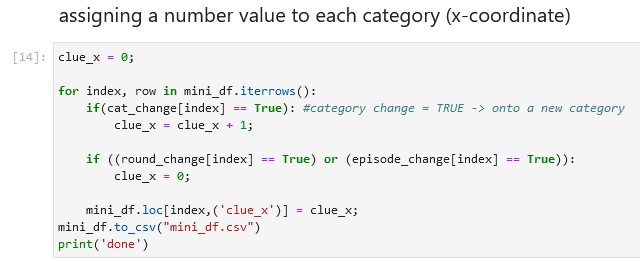

Well, what I had forgotten to account for were edge cases, such as times where the game ran out of time and the contestants weren't able to get to a specific column.

What this meant was the heatmaps I attempted to generate were nothing. They didn't make any sense even to what rudimentary level of analysis I had at that point.

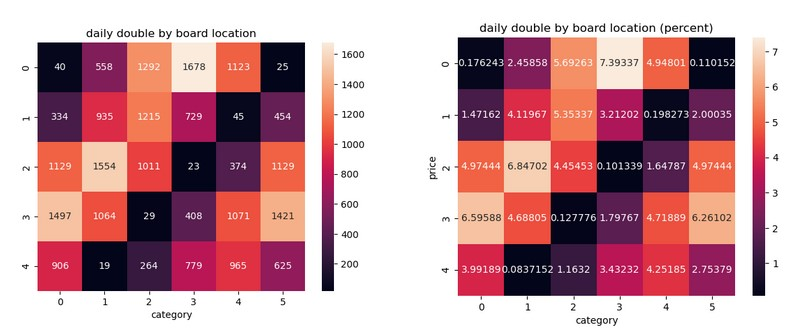

Naturally, my user feedback came back correspondingly -- my visualizations weren't accurate to any degree. The only story they told was that something had gone wrong between my opening the dataset and the seaborn visualization being generated.

## 2. Failed Attempts

See Above

No, but after I realized I couldn't map the Daily Double questions, I decided to look again at a comparision box plot... and that's where [my boxplot](#1.-Season-to-Season-Comparison) was imagined. And with [my bar chart](#b.-The-Plot-w/-No-Outliers) I realized that, even if I couldn't map a clue's x-coordinate to a map, I still had a verifiable way to see what row a Daily Double landed on.

## 3. Where To Revise

If I were to revisit my visualizations I would want to take a closer look at Jeopardy vs. Double Jeopardy as far as row location goes. Also, in my dataset, there is a CSV file containing strictly the teen and college matches -- I would like to see how adolescent behaviors play into their Daily Double wagers.

## 4. Marginalization

I do not see my visualization/story marginalizing any one group. Though I would say, I am sure people with more experience in data visualization could squeeze out stronger correlations and conclusions from the data. Perhaps a work in collaboration with J! Archive could provide fruitful in highlighting more faithful stories.

## 5. What I Liked Best

It was fun to learn more about the history of Jeopardy! and the mechanics behind the Daily Double. I liked being able to track my progress throughout various notebooks and see a visual I imagined on paper be put on screen. And I liked diving more into my favorite game show!

# VI. References

(2023, September 10). Jeopardy Clues. Kaggle. https://www.kaggle.com/datasets/joebeachcapital/jeopardy-clues?resource=download

(2023). J! Archive. https://www.j-archive.com

Stump, S. (2019, April 24). “jeopardy!” champ James Holzhauer has now won over $1 million. TODAY.com. https://www.today.com/popculture/jeopardy-winner-james-holzhauer-sets-sights-new-record-t152397 

Wollen, J. (2023). GitHub - jwolle1/jeopardy_clue_dataset: A dataset containing 473,000 Jeopardy! clues (1984–2023).. Jwolle1/jeopardy_clue_dataset: A dataset containin. https://github.com/jwolle1/jeopardy_clue_datas

# Dedicated to Alex Trebek and Mere-Mere